# **BOOTCAMP DATA SCIENCE NA PRÁTICA II**

1. Passo-a-passo de um Projeto de Data Science 
2. Passo-a-passo da Análise Exploratória
3. Modelagem de Dados

## **1. Passo-a-passo de um Projeto de Data Science**

### Passo-a-passo

![picture](https://drive.google.com/uc?id=1obFDbhG3feu7_Hc0JqFdOaHGsojsaQ6F)







*Referências: Rezende, S. O. Sistemas inteligentes: fundamentos e aplicações. Editora Manole Ltda, 2003;  Aula 1 - Professor Ricardo Marcacini - Mineração de Dados Não Estruturados, ICMC-USP*


**1. Identificação do Problema:** entender o objetivo dessa aplicação, quais os dados que serão trabalhados, o que queremos alcançar/metas.

**2. Pré-processamento:** analise exploratória, limpeza (valores ausentes e inconsistentes), transformação de dados(conversão de valores, normalização, padronização), redução da dimensionalidade, balanceamento dos dados.

**3. Extração de padrões:** aplicar técnicas de machine learning.

**4. Pós-processamento:** métricas de avaliação, verificar as metas.

**5. Utilização do conhecimento:** aplicar no mercado (diagnóstico de doenças, análise de fraude, métricas de redes sociais)

Trabalharemos com o dataset sobre preços de abacates.

Para saber mais sobre: https://www.kaggle.com/neuromusic/avocado-prices




## **2. Análise Exploratória**

### Carregamento dos dados

In [1]:
# Importação de bibliotecas
import pandas                 as pd
import numpy                  as np
import seaborn                as sns
import matplotlib.pyplot      as plt
import pylab

# from google.colab             import files
from IPython.display          import Image
from warnings                 import simplefilter
from sklearn.model_selection  import train_test_split
from sklearn.metrics          import r2_score
from sklearn.preprocessing    import StandardScaler
from sklearn.metrics          import accuracy_score, classification_report
from sklearn.ensemble         import RandomForestClassifier
from sklearn.tree             import DecisionTreeClassifier
from sklearn.linear_model     import LinearRegression
from pandas_profiling         import ProfileReport


simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Subindo o csv
# n = files.upload()

In [2]:
# Importando o CSV para um DataFrame
df = pd.read_csv("avocado.csv")

In [3]:
# Verificando as 10 primeiras linhas do DataFrame.
df.head(10)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   
5           5  2015-11-22          1.26      55979.78  1184.27   48067.99   
6           6  2015-11-15          0.99      83453.76  1368.92   73672.72   
7           7  2015-11-08          0.98     109428.33   703.75  101815.36   
8           8  2015-11-01          1.02      99811.42  1022.15   87315.57   
9           9  2015-10-25          1.07      74338.76   842.40   64757.44   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   
5   43.61     6683.91     6556.47      127.44          0.0  conventional   
6   93.26     8318.86     8196.81      122.05          0.0  conventional   
7   80.00     6829.22     6266.85      562.37          0.0  conventional   
8   85.34    11388.36    11104.53      283.83          0.0  conventional   
9  113.00     8625.92     8061.47      564.45          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany  
5  2015  Albany  
6  2015  Albany  
7  2015  Albany  
8  2015  Albany  
9  2015  Albany

### Informações dos dados

In [4]:
# Tipo dos dados
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
# Dimensão dos dados
print('Numero de linhas:', df.shape[0])
print('Numero de colunas:', df.shape[1])

Numero de linhas: 18249
Numero de colunas: 14


In [6]:
# Verificando as colunas existentes
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Descrição das colunas relevantes:


*   `Date`: data de observação
*   `AveragePrice`: preço médio de um abacate simples
*   `Total Volume`: quantidade total de abacates vendidos
*   `4046`: quantidade de abacates não-orgânicos de tamanho pequeno/médio (PLU 4046) vendidos
*   `4225`: quantidade de abacates não-orgânicos de tamanho grande (PLU 4225) vendidos
*   `4770`: quantidade de abacates não-orgânicos de tamanho extra grande (PLU 4770) vendidos
*   `type`: convencional ou orgânica 
*   `year`: ano
*   `region`: região ou cidade onde os dados foram coletados

In [7]:
# Renomeando as colunas relevantes
df = df.rename(columns={'Date': 'data',
                        'AveragePrice': 'preco',
                        'Total Volume': 'acabatesTotalVendidos',
                        '4046': 'abacatesPequenosVendidosNaoOrganicos',
                        '4225': 'abacatesGrandesVendidosNaoOrganicos',
                        '4770': 'abacatesExtragrandesVendidosNaoOrganicos',
                        'type': 'tipo',
                        'year': 'ano',
                        'region': 'regiao'})

In [8]:
# Descrição estatística
df.describe()

Unnamed: 0         preco  acabatesTotalVendidos  \
count  18249.000000  18249.000000           1.824900e+04   
mean      24.232232      1.405978           8.506440e+05   
std       15.481045      0.402677           3.453545e+06   
min        0.000000      0.440000           8.456000e+01   
25%       10.000000      1.100000           1.083858e+04   
50%       24.000000      1.370000           1.073768e+05   
75%       38.000000      1.660000           4.329623e+05   
max       52.000000      3.250000           6.250565e+07   

       abacatesPequenosVendidosNaoOrganicos  \
count                          1.824900e+04   
mean                           2.930084e+05   
std                            1.264989e+06   
min                            0.000000e+00   
25%                            8.540700e+02   
50%                            8.645300e+03   
75%                            1.110202e+05   
max                            2.274362e+07   

       abacatesGrandesVendidosNaoOrganicos  \
count                         1.824900e+04   
mean                          2.951546e+05   
std                           1.204120e+06   
min                           0.000000e+00   
25%                           3.008780e+03   
50%                           2.906102e+04   
75%                           1.502069e+05   
max                           2.047057e+07   

       abacatesExtragrandesVendidosNaoOrganicos    Total Bags    Small Bags  \
count                              1.824900e+04  1.824900e+04  1.824900e+04   
mean                               2.283974e+04  2.396392e+05  1.821947e+05   
std                                1.074641e+05  9.862424e+05  7.461785e+05   
min                                0.000000e+00  0.000000e+00  0.000000e+00   
25%                                0.000000e+00  5.088640e+03  2.849420e+03   
50%                                1.849900e+02  3.974383e+04  2.636282e+04   
75%                                6.243420e+03  1.107834e+05  8.333767e+04   
max                                2.546439e+06  1.937313e+07  1.338459e+07   

         Large Bags    XLarge Bags           ano  
count  1.824900e+04   18249.000000  18249.000000  
mean   5.433809e+04    3106.426507   2016.147899  
std    2.439660e+05   17692.894652      0.939938  
min    0.000000e+00       0.000000   2015.000000  
25%    1.274700e+02       0.000000   2015.000000  
50%    2.647710e+03       0.000000   2016.000000  
75%    2.202925e+04     132.500000   2017.000000  
max    5.719097e+06  551693.650000   2018.000000

In [9]:
# Verificando as variáveis com valores nulos
df.isna().sum()

Unnamed: 0                                  0
data                                        0
preco                                       0
acabatesTotalVendidos                       0
abacatesPequenosVendidosNaoOrganicos        0
abacatesGrandesVendidosNaoOrganicos         0
abacatesExtragrandesVendidosNaoOrganicos    0
Total Bags                                  0
Small Bags                                  0
Large Bags                                  0
XLarge Bags                                 0
tipo                                        0
ano                                         0
regiao                                      0
dtype: int64

### Filtragem das variáveis

In [10]:
# Fazendo uma cópia do DataFrame
df1 = df.copy()

In [11]:
# Transformando a coluna data para datetime
df1['data'] = pd.to_datetime(df1['data'])

In [12]:
# Armazenando os meses da variável 'data'
df1['mes'] = df1['data'].dt.month

In [13]:
# Dropando as variáveis que não serão utilizadas
cols_drop = ['Unnamed: 0', 'data', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
df1 = df1.drop(cols_drop, axis=1)

In [14]:
df1.head()

preco  acabatesTotalVendidos  abacatesPequenosVendidosNaoOrganicos  \
0   1.33               64236.62                               1036.74   
1   1.35               54876.98                                674.28   
2   0.93              118220.22                                794.70   
3   1.08               78992.15                               1132.00   
4   1.28               51039.60                                941.48   

   abacatesGrandesVendidosNaoOrganicos  \
0                             54454.85   
1                             44638.81   
2                            109149.67   
3                             71976.41   
4                             43838.39   

   abacatesExtragrandesVendidosNaoOrganicos          tipo   ano  regiao  mes  
0                                     48.16  conventional  2015  Albany   12  
1                                     58.33  conventional  2015  Albany   12  
2                                    130.50  conventional  2015  Albany   12  
3                                     72.58  conventional  2015  Albany   12  
4                                     75.78  conventional  2015  Albany   11

In [15]:
df1.dtypes

preco                                       float64
acabatesTotalVendidos                       float64
abacatesPequenosVendidosNaoOrganicos        float64
abacatesGrandesVendidosNaoOrganicos         float64
abacatesExtragrandesVendidosNaoOrganicos    float64
tipo                                         object
ano                                           int64
regiao                                       object
mes                                           int64
dtype: object

In [16]:
# Separando as variáveis numéricas em uma variavel
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])

# Separando as variáveis categoricas em outra variavel
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64'])

### Engenharia de atributos

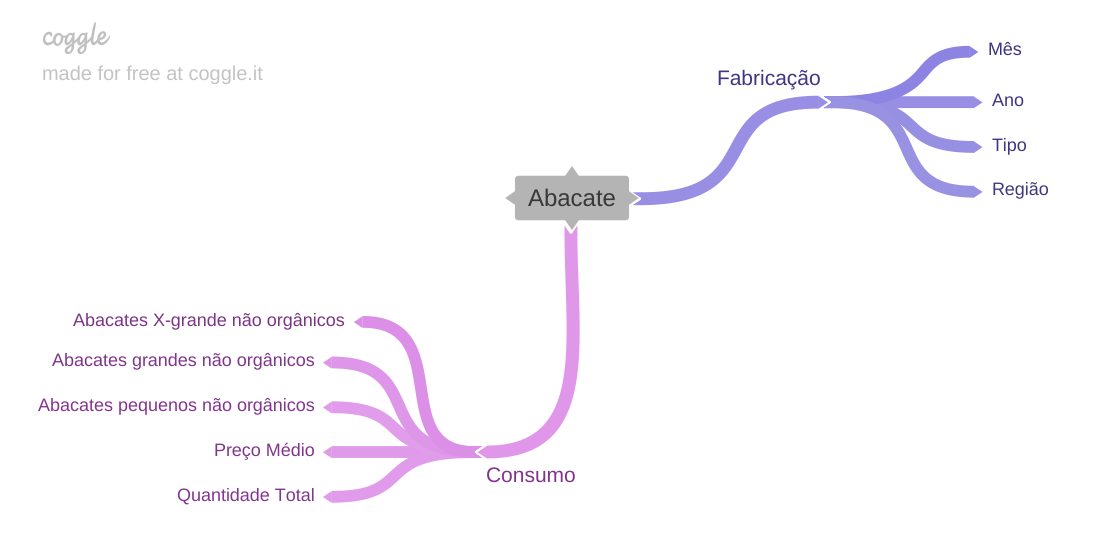

In [17]:
# Mapa mental para criação de hipótese
Image('avocado.png')

**Hipóteses:**

1 - Existem mais tipos de abacates convencionais do que orgânicos

2 - O segundo semestre é o período que menos se vende abacate

3 - O preço médio dos abacates aumentam a cada ano

4 - O preço médio dos abacates variam de região para região.

5 - Vende-se mais abacates convencionais do que orgânicos

6 - O preço do abacate orgânico é maior que o abacate convencional

In [18]:
# Função de tamanho dos gráficos
def tamanho():
    pylab.rcParams['figure.figsize'] = (10.0, 5.0)
tamanho()

### Análise Exploratória dos Dados

In [19]:
# Preço medio do ABACATE por meses do ano em ordem decrescente
precoMedio_porMes = df1.groupby('mes')['preco'].max().sort_values(ascending=False).reset_index()
precoMedio_porMes

mes  preco
0    10   3.25
1     4   3.17
2    11   3.12
3     3   3.05
4     8   3.04
5     9   2.97
6     6   2.77
7     7   2.75
8     5   2.73
9     1   2.70
10   12   2.67
11    2   2.59

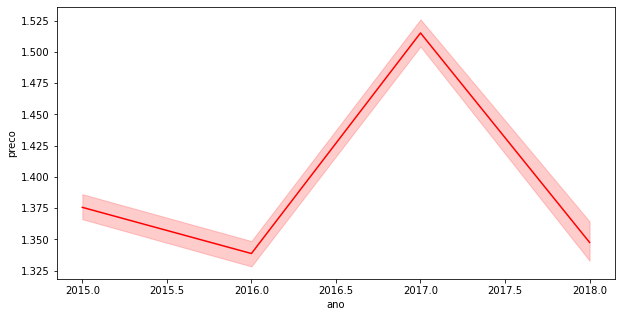

In [20]:
# Distribuição da Média de preços pelos valores da coluna Ano
sns.lineplot(x = df1['ano'], y = df1['preco'], color = "red");

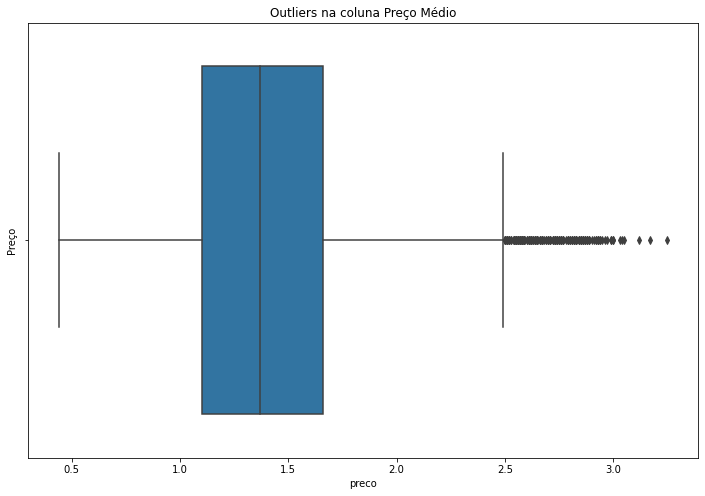

In [21]:
# Outliers do preço médio

ax = plt.figure(figsize=(12, 8))

sns.boxplot(x='preco', data = df)

plt.ylabel("Preço")
plt.title("Outliers na coluna Preço Médio")

plt.show()

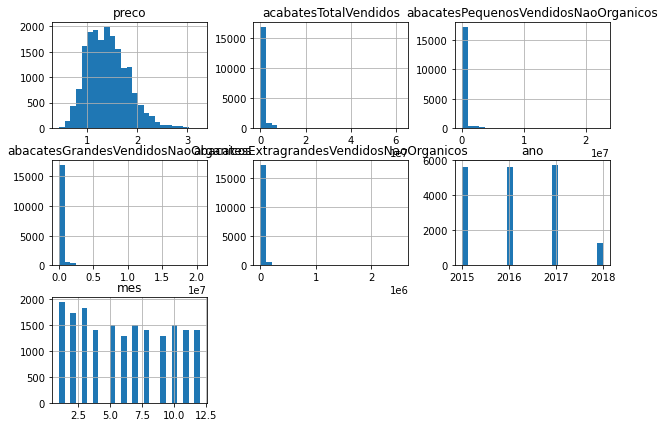

In [22]:
# Histograma das variáveis numéricas
num_attributes.hist(bins=25, figsize=(10, 7));

**TESTANDO AS HIPÓTESES**

**1 - Existem mais tipos de abacates convencionais do que orgânicos**

Verdade... Pelo gráfico não dá para ter noção, por isso usa-se o "value_counts" para ter os valores exatos.

conventional    9126
organic         9123
Name: tipo, dtype: int64

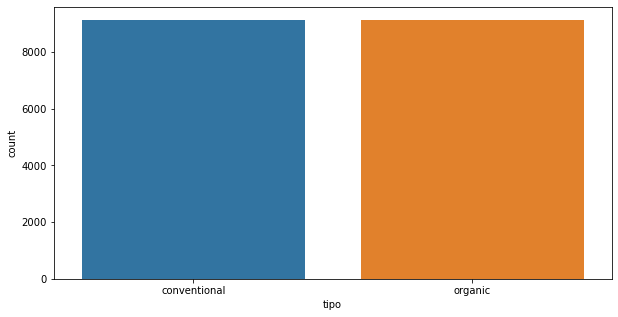

In [23]:
sns.countplot(df1['tipo']);

df1['tipo'].value_counts()

**2 - O segundo semestre é o período que menos se vende abacate**

Verdade. A partir do mês de julho (7) as vendas vai caindo, começando a subir apenas em dezembro (12)

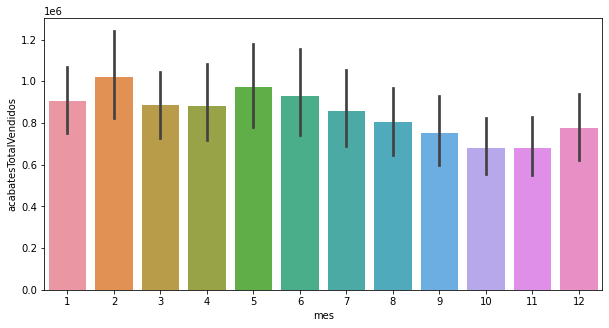

In [24]:
sns.barplot(x='mes', y='acabatesTotalVendidos', data=df1);

**3 - O preço médio dos abacates aumentam a cada ano**

Mentira... É visto que não há uma constância no preço médio ao decorrer dos anos

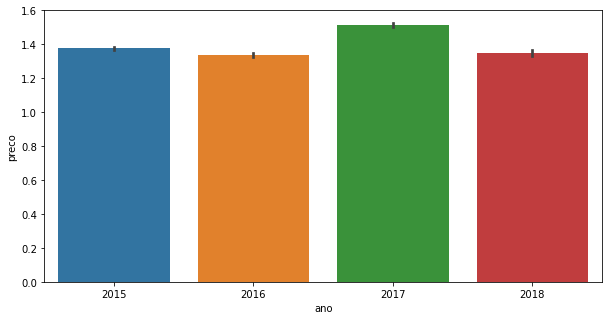

In [25]:
sns.barplot(x='ano', y='preco', data=df1);

**4 - O preço médio dos abacates variam de região para região.**

Verdade... O gráfico mostra que cada região apresenta um preço médio diferente

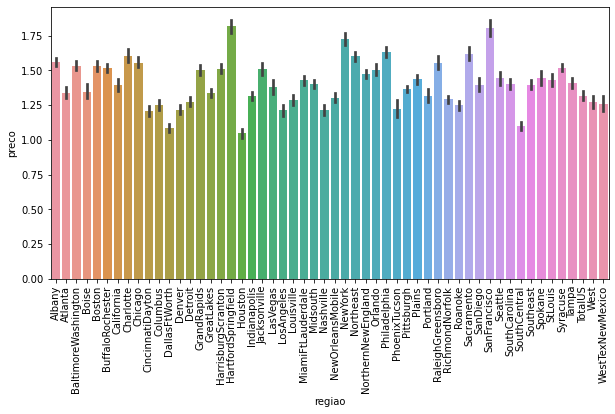

In [26]:
sns.barplot(x='regiao', y='preco', data=df1);
plt.xticks(rotation=90);

**5 - Vende-se mais abacates convencionais do que orgânicos**

Verdade... A diferença é grande nas vendas de abacate convencional para orgânico

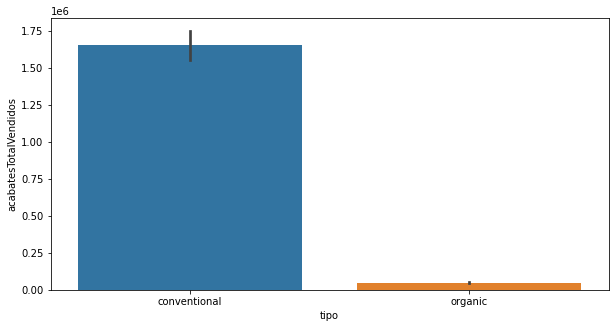

In [27]:
sns.barplot(x='tipo', y='acabatesTotalVendidos', data=df1);

**6 - O preço do abacate orgânico é maior que o abacate convencional**

Verdade. O preço do abacate orgânico é superior ao do abacate convencional

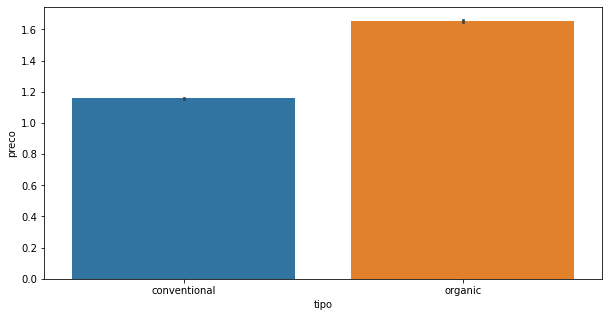

In [28]:
sns.barplot(x='tipo', y='preco', data=df1);

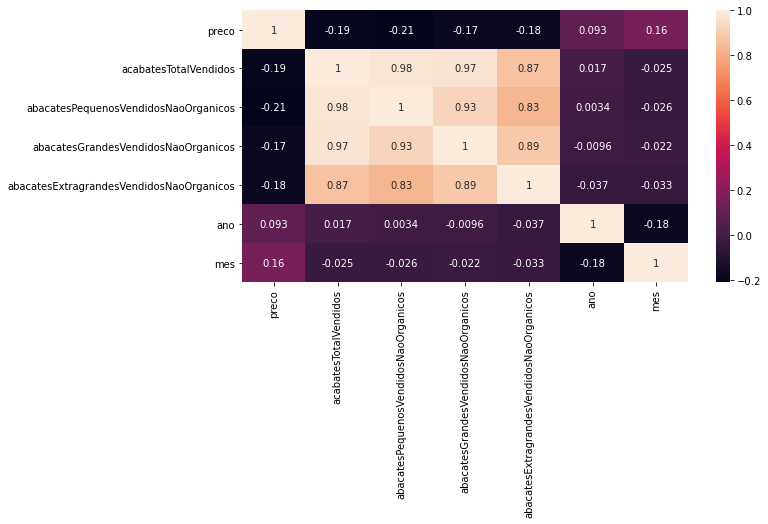

In [29]:
# Matriz de correlação
corr = num_attributes.corr(method = 'pearson')
sns.heatmap(corr, annot=True);

In [30]:
# Automatizando a EDA

profile = ProfileReport(df1, title='Profiling Abacates',html={'style':{'full_width':True}})
profile

## **3. Modelagem de Dados**

In [31]:
df2 = df1.copy()

In [32]:
df2.head()

preco  acabatesTotalVendidos  abacatesPequenosVendidosNaoOrganicos  \
0   1.33               64236.62                               1036.74   
1   1.35               54876.98                                674.28   
2   0.93              118220.22                                794.70   
3   1.08               78992.15                               1132.00   
4   1.28               51039.60                                941.48   

   abacatesGrandesVendidosNaoOrganicos  \
0                             54454.85   
1                             44638.81   
2                            109149.67   
3                             71976.41   
4                             43838.39   

   abacatesExtragrandesVendidosNaoOrganicos          tipo   ano  regiao  mes  
0                                     48.16  conventional  2015  Albany   12  
1                                     58.33  conventional  2015  Albany   12  
2                                    130.50  conventional  2015  Albany   12  
3                                     72.58  conventional  2015  Albany   12  
4                                     75.78  conventional  2015  Albany   11

In [33]:
# Armazenamento dos valores das outras colunas restantes na variável X
X = df2.drop(['tipo'], axis = 1)

# Armazenamento dos valores da coluna AveragePrice na variável y
y = df2['tipo']  

# Transformando as variáveis categóricas em numéricas
X = pd.get_dummies(X)
y = pd.get_dummies(y)

# Scaling os dados
ss = StandardScaler()
X = ss.fit_transform(X)

In [34]:
# Separando o dataset em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

### Random Forest

In [35]:
# Instanciando o random forest
random_forest = RandomForestClassifier()

# Treinando o modelo
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Predição dos tipos de abacates
y_pred = random_forest.predict(X_test)

# Acurácia do modelo criado
accuracy_score(y_test, y_pred)*100

99.91780821917808

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1820
           1       1.00      1.00      1.00      1830

   micro avg       1.00      1.00      1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650
 samples avg       1.00      1.00      1.00      3650



### Árvore de Decisão

In [38]:
# Instanciando a arvore de decisão
decision_tree = DecisionTreeClassifier()

# Treinando o modelo
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Predição dos tipos de abacates
y_pred = decision_tree.predict(X_test)

# Acurácia do modelo criado
accuracy_score(y_test, y_pred)*100

99.72602739726028

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1820
           1       1.00      1.00      1.00      1830

   micro avg       1.00      1.00      1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650
 samples avg       1.00      1.00      1.00      3650



### Regressão Linear

In [41]:
# Instanciando a regressão linear
regressaoLinear = LinearRegression()

# Treinando o modelo
modelo = regressaoLinear.fit(X_train, y_train)

In [42]:
# Predição dos tipos de abacates
y_pred = regressaoLinear.predict(X_test)

# Acurácia do modelo criado
r2_score(y_test, y_pred)*100

49.19243665930513